# Il COVID-19 in Italia
## Introduzione
Prima di cominciare, devo fare un disclaimer: non sono un epidemiologo o un infettivologo, sono solo un chimico a cui piace analizzare dati e cercare di capire quello che i dati raccontano. Cercherò di essere il più trasparente possibile, ma prendete tutto quello che leggerete con spirito critico, confrontate con i dati che riporto, arrivate alle vostre conclusioni e poi confrontatele con le mie; se non dovessero combaciare non fatevi problemi a contattarmi se volete approfondire il discorso. 

Fatta questa premessa, proseguo con la presentazione del progetto. 

La pandemia ha cambiato le nostre vite in maniera inaspettata e repentina, e i suoi numeri sono al centro dell'attenzione mediatica dai suoi inizi. Non passa un giorno che non si sentano numeri dei nuovi casi, numeri di tamponi, numeri di ricoveri e così via; questi numeri sono importantissimi perché ci danno un'idea dell'andamento della situazione, ma decontestualizzati molto spesso possono essere interpretati nel modo sbagliato o portare a confusione.

Con questo articolo, vorrei cercare di fare un po' di chiarezza sui numeri, su quello che significano e su come leggerli nel loro insieme.

Per farlo, utilizzerò i seguenti strumenti:

* Linguaggio Python: è un linguaggio di programmazione 
* Jupyter Notebook, NumPy, Pandas e Seaborn: sono delle librerie di Python che facilitano l'analisi statistica, permettendo di manipolare i dati comodamente e presentarli in maniera chiara
* Dati sull'andamento epidemiologico: i dati sull'andamento epidemiologico sono quelli che sono pubblicati dal Dipartimento di Protezione Civile, li potete trovare [qui](https://github.com/pcm-dpc/COVID-19) 
* Dati sulle vaccinazioni: i dati sulle vaccinazioni sono quelli pubblicati dal governo in formato aperto, li potete trovare [qui](https://github.com/italia/covid19-opendata-vaccini)

Cercherò di delineare tutti i passaggi che seguo, sia per cercare di rendere le cose più chiare, che per dare la possibilità a chiunque di esplorare i gli stessi dati e arrivare alle proprie conclusioni.

## Preparazione del dataset
Per prima cosa, devo svolgere alcune operazioni preliminari per recuperare i dati più aggiornati dalle repository che citavo sopra e preparare l'ambiente di analisi.

In [1]:
# Import the necessary libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm

# Set up
plt.style.use('seaborn')
sns.set_theme()

# Recover the national data and store it in the national_data data frame
# national_data_URL = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
# national_data  = pd.read_csv(national_data_URL)
national_data = pd.read_csv("./dpc-covid19-ita-andamento-nazionale.csv", parse_dates=True, index_col=0)

# Recover the regional data and store it in the regional_data data frame
#regional_data_URL = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"
#regional_data = pd.read_csv(file=regional_data_URL)
regional_data  =  pd.read_csv("./dpc-covid19-ita-regioni.csv")

# Recover the population by age range for each region and store it in the regional_population_by_age data frame
#regional_population_by_age_URL = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-statistici-riferimento/popolazione-istat-regione-range.csv"
#regional_population_by_age = pd.read_csv(file=regional_population_by_age_URL)
regional_population_by_age = pd.read_csv("./popolazione-istat-regione-range.csv")

# Recover the vaccine data by age group and store it in the vaccine_data_by_age data frame
#vaccine_data_by_age_URL = "https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv"
#vaccine_data_by_age = pd.read_csv(vaccine_data_by_age_URL)
vaccine_data_by_age = pd.read_csv("./somministrazioni-vaccini-latest.csv")

# Recover the vaccine data and store it in the vaccine_data data frame
#vaccine_data_URL = "https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-summary-latest.csv"
#vaccine_data = pd.read_csv(vaccine_data_URL)
vaccine_data = pd.read_csv("./somministrazioni-vaccini-summary-latest.csv", parse_dates=True, index_col=0)

## Analisi

### Il numero dei casi, i tamponi e le terapie intensive

Per prima cosa vediamo la curva dei casi, ossia la curva del numero dei nuovi positivi rispetto al giorno precedente.
Indicativamente dovrebbe essere una fotografia dell'andamento della pandemia, ma se visto in maniera superficiale potrebbe portare a delle conclusioni errate: il numero di casi infatti sembra relativamente basso per la prima ondata, dove non supera mai i 10000, più alto per la seconda, dove arriva a 40000 e molto alto per la quarta, dove arriva in poco tempo a 50000, come mai?

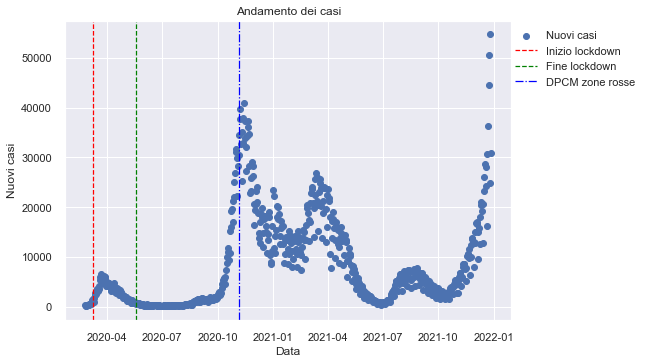

In [2]:
# Create the figure
new_cases_figure, new_cases_axes = plt.subplots()
# Create the plots
new_cases_axes.scatter(data = national_data, x = national_data.index, y = 'nuovi_positivi', label='Nuovi casi')
new_cases_axes.axvline(pd.to_datetime('2020-03-09'), ls = '--', lw = 1.25, label = "Inizio lockdown", color = 'red')
new_cases_axes.axvline(pd.to_datetime('2020-05-18'), ls = '--', lw = 1.25, label = "Fine lockdown", color = 'green')
new_cases_axes.axvline(pd.to_datetime('2020-11-06'), ls = '-.', lw = 1.25, label = "DPCM zone rosse", color = 'blue')

# Axes and legend 
new_cases_axes.set_ylabel('Nuovi casi')
new_cases_axes.set_xlabel('Data')
new_cases_axes.set_title("Andamento dei casi")
new_cases_axes.legend(loc='upper right', bbox_to_anchor=(1.30, 1))

Il numero di casi positivi rilevati dipende sia dalla diffusione della malattia, che della capacità dell'infrastruttura di effettuare e processare i tamponi. Intuitivamente verrebbe da pensare che ad inizio pandemia la capacità di gestire i tamponi fosse limitata, e che sia migliorata gradualmente nel tempo, è possibile verificare questa intuizione? Sì, perché nel dataset fornito dalla Protezione Civile è presente il numero di tamponi complessivo, è abbastanza semplice quindi calcolare il numero di tamponi giornaliero e metterlo in un grafico.

Text(0.5, 1.0, 'Tamponi nella prima fase')

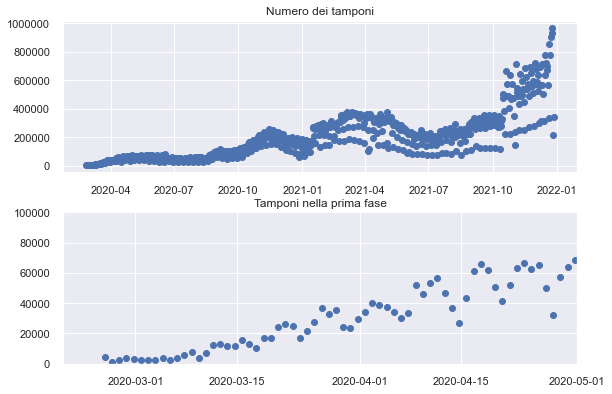

In [3]:
# Compute 'tamponi_giornalieri' as 'tamponi' for day (n) - 'tamponi' for day (n-1)
national_data['tamponi_giornalieri'] = national_data['tamponi'].diff()

# Create the figure
swab_tests_figure, swab_tests_axes = plt.subplots(2)
swab_tests_figure.tight_layout()

# Create the first plot 
swab_tests_axes[0].scatter(data = national_data[national_data['tamponi_giornalieri'] >= 0], x = national_data[national_data['tamponi_giornalieri'] >= 0].index, y = 'tamponi_giornalieri')
# Axes for first plot
swab_tests_axes[0].ticklabel_format(style='plain', axis= 'y')
swab_tests_axes[0].set_title("Numero dei tamponi")

# Create the second plto
swab_tests_axes[1].scatter(data = national_data[national_data['tamponi_giornalieri'] >= 0], x = national_data[national_data['tamponi_giornalieri'] >= 0].index, y = 'tamponi_giornalieri')

# Set axes limits for second plot
swab_tests_axes[1].set_xlim(right = pd.to_datetime('2020-05-01'), left = pd.to_datetime('2020-02-20'))
swab_tests_axes[1].set_ylim(top = 100000, bottom = -20)
# Set axes for second plot
swab_tests_axes[1].ticklabel_format(style='plain', axis= 'y')
swab_tests_axes[1].set_title("Tamponi nella prima fase")



Il numero di tamponi ha una variabilità dovuta all'effettiva necessità di effettuarli, ma è evidente come la capacità dell'infrastruttura di processare un numero maggiore di tamponi sia aumentata nel tempo. Nelle prime fasi della pandemia, dove la necessità era sicuramente alta, il numero di tamponi giornalieri processati era al di sotto dei 100000, mentre verso la fine del 2021 era intorno ai 600000.
Quindi se il numero totale dei positivi rilevati dipende dal numero dei tamponi e il numero dei tamponi dipende dalla capacità del sistema di processarli, cosa possiamo usare come indicatore della diffusione della malattia? 
L'indicatore ideale sarebbe il rapporto tra numero di tamponi e numero di positivi su un campione casuale di popolazione, la statistica che più gli si avvicina, usando i dati che abbiamo a disposizione, è il rapporto percentuale tra il numero dei positivi e il numero di tamponi effettuati, che si differenzia dal caso ideale solo per il fatto che il campione non è completamente casuale. 
Rimane comunque la statistica più robusta perché trattandosi di un rapporto è indipendente dai numeri ed è perciò più o meno confrontabile lungo tutto il periodo (dico più o meno perché, come al solito, più dati si hanno e più la statistica è robusta).

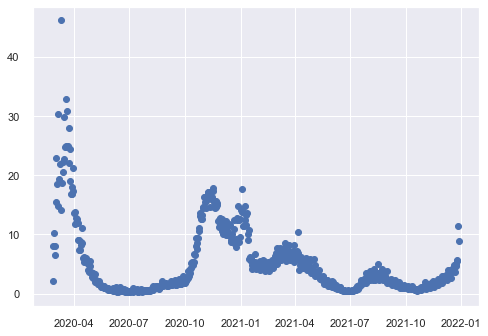

In [4]:
national_data['percentuale_tamponi_positivi'] = national_data['nuovi_positivi'] / national_data['tamponi_giornalieri'] * 100

positivity_ratio_figure, positivity_ratio_axes = plt.subplots()
positivity_ratio_axes.scatter(data = national_data[national_data['percentuale_tamponi_positivi'] >= 0], x = national_data[national_data['percentuale_tamponi_positivi'] >= 0].index, y ='percentuale_tamponi_positivi', )

Nella fase più acuta della prima ondata il rapporto era intorno ai 30%, ossia uno su tre tamponi erano positivi; con il numero di tamponi della fine del 2021, varrebbe a dire un 200000 positivi su 600000 tamponi.
Questo rapporto è poi diminuito nell'estate del 2020, segno dell'efficacia del lockdown nel fermare la diffusione del virus, ed è gradualmente riaumentato con la seconda e terza ondata, rimanendo però ben al di sotto delle soglie toccate nella prima, segno dell'efficacia generale delle restrizioni e delle vaccinazioni (a partire da inizio 2021).
Quindi quando i telegiornali titolano "numero di casi record", lo fanno un po' sensazionalisticamente, perché un conto sono centomila casi su un milione di tamponi, un conto invece sarebbero centomila casi su duecentomila tamponi. 

Un altro fattore che ha guidato le scelte politiche in termini di asprezza delle restrizioni, è sicuramente l'occupazione delle terapie intensive.

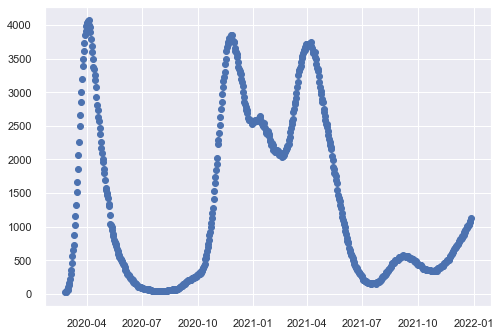

In [5]:
intensive_care_figure, intensive_care_axes = plt.subplots()

intensive_care_axes.scatter(data = national_data, x = national_data.index, y = 'terapia_intensiva')



L'andamento della curva è, poco sorprendentemente, simile alle altre, nel senso che ci sono tre picchi di occupazione delle terapie intensive, corrispondenti alle tre ondate. Nonostante la situazione fosse critica in tutte e tre le ondate, il picco di occupazione della seconda e della terza ondata era leggermente più basso di quello della prima.

Cosa succede se confrontiamo questo andamento con quello dei casi?

(18475.0, 18748.0)

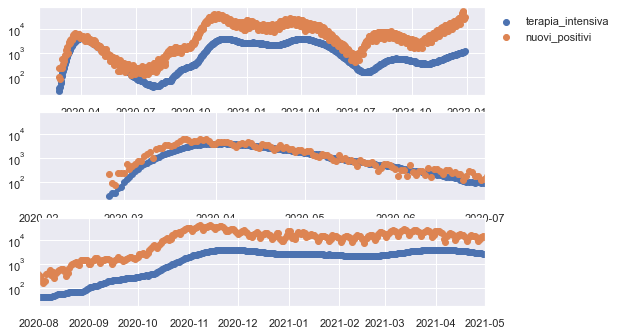

In [6]:
intensive_care_vs_cases_figure, intensive_care_vs_cases_axes = plt.subplots(3)
intensive_care_figure.tight_layout()

intensive_care_vs_cases_axes[0].scatter(data = national_data, x = national_data.index, y = 'terapia_intensiva')
intensive_care_vs_cases_axes[0].scatter(data = national_data, x = national_data.index, y = 'nuovi_positivi')
intensive_care_vs_cases_axes[0].set_yscale("log")
intensive_care_vs_cases_axes[0].legend(loc='upper right', bbox_to_anchor=(1.30, 1))

intensive_care_vs_cases_axes[1].scatter(data = national_data, x = national_data.index, y = 'terapia_intensiva')
intensive_care_vs_cases_axes[1].scatter(data = national_data, x = national_data.index, y = 'nuovi_positivi')
intensive_care_vs_cases_axes[1].set_yscale("log")
intensive_care_vs_cases_axes[1].set_xlim(left = pd.to_datetime('2020-02'), right = pd.to_datetime('2020-07'))

intensive_care_vs_cases_axes[2].scatter(data = national_data, x = national_data.index, y = 'terapia_intensiva')
intensive_care_vs_cases_axes[2].scatter(data = national_data, x = national_data.index, y = 'nuovi_positivi')
intensive_care_vs_cases_axes[2].set_yscale("log")
intensive_care_vs_cases_axes[2].set_xlim(left = pd.to_datetime('2020-08'), right = pd.to_datetime('2021-05'))

# Compute the gradient to make it more clear

La sovrapposizione ci porta a vedere con i numeri quello che abbiamo sentito molte volte: il COVID ha un tempo di incubazione lungo. Infatti, la curva dei casi è leggermente in "anticipo" rispetto alla curva delle terapie intensive, questo perché, teoricamente, da quando il caso viene rilevato, a quando sviluppa sintomi, a quando questi diventano gravi, passa una certa quantità di tempo, che dai grafici, molto a spanne, sembrerebbe intorno alle due settimane.

### Andamenti per territorio e per fasce di popolazione

Nella parte precedente abbiamo analizzato gli andamenti generali, dando uno sguardo d'insieme al paese. In questo paragrafo invece vorrei cercare di dare un'occhiata a come il COVID si è distribuito nelle diverse regioni e nelle diverse fasce di popolazione. Questa sezione è da intepretare in maniera ancora più critica, per prima cosa perché non ho le competenze per trarre delle conclusioni vere e proprie, e in secondo luogo perché i dati che abbiamo a disposizione non sono casuali e quindi non sono perfettamente rappresentativi della popolazione, sia in termini di territorio che in termini di fascia di età. Ricapitolando quindi, i grafici e le considerazioni seguenti vogliono essere soltanto una fotografia dei dati.

Il primo dato che mi interessa approfondire è se il COVID si è distribuito in alcune regioni più di altre, e quali potrebbero essere le ragioni, tenendo in mente che i dati che ho a disposizione:
- dividono il Trentino in provincia autonoma di Trento e provincia autonoma di Bolzano, per chiarezza io ho preferito unire nuovamente i dati nella regione Trentino
- non tengono conto di eventuali reinfezioni, in altre parole se una persona viene contagiata due volte, verrà contata due volte. Questo vuol dire che il numero di positivi potrebbe essere leggermente superiore al numero di persone singole che hanno avuto il COVID, se venissero contate una sola volta

/var/folders/0h/nb_1tw355c51krpccz47tcgw0000gn/T/ipykernel_12890/4288435318.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  total_cases_by_region_axes.set_xticklabels(total_cases_by_region.index, rotation=45, ha="right")


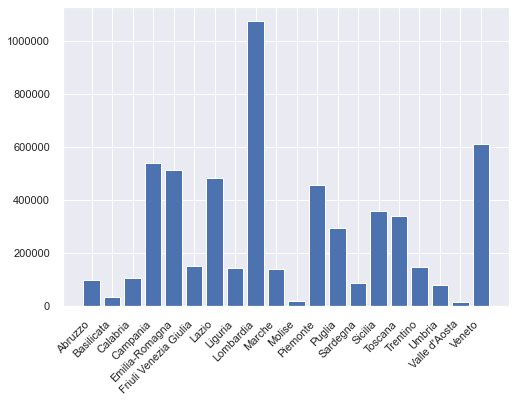

In [7]:

regional_data.replace(to_replace = "P.A. Bolzano", value = "Trentino", inplace=True)
regional_data.replace(to_replace = "P.A. Trento", value = "Trentino", inplace=True)

total_cases_by_region = regional_data.pivot_table(index="denominazione_regione", values="nuovi_positivi", aggfunc=np.sum)

total_cases_by_region_fig, total_cases_by_region_axes = plt.subplots()

total_cases_by_region_axes.bar(total_cases_by_region.index, total_cases_by_region["nuovi_positivi"])
total_cases_by_region_axes.set_xticklabels(total_cases_by_region.index, rotation=45, ha="right")
total_cases_by_region_axes.ticklabel_format(style='plain', axis= 'y')


C'è un problema evidente con questo grafico: contando i casi totali, non tiene conto del fatto che alcune regioni sono molto più popolose di altre, e di conseguenza i loro numeri di casi totali saranno per forza di cose più eleveti. Per ovviare a questo problema, al posto di guardare ai casi totali, possiamo provare a guardare al rapporto percentuale tra i casi totali e la popolazione della regione, per ottenere un numero che può essere confrontato tra le diverse regioni. 

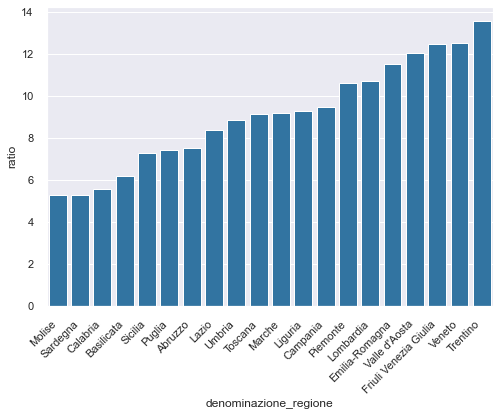

In [8]:
regional_population_by_age.replace(to_replace="Trento", value="Trentino", inplace=True)
regional_population_by_age.replace(to_replace="Bolzano", value="Trentino", inplace=True)

total_cases_by_region["totale_generale"] = regional_population_by_age.pivot_table(index="denominazione_regione", values="totale_generale", aggfunc=np.sum)["totale_generale"]

total_cases_by_region["ratio"] = total_cases_by_region["nuovi_positivi"] / total_cases_by_region["totale_generale"] * 100

total_cases_by_region.sort_values(by="ratio", inplace=True)

total_cases_by_region_ratio_fig, total_cases_by_region_ratio_axes = plt.subplots()

sns.barplot(ax=total_cases_by_region_ratio_axes, x=total_cases_by_region.index, y=total_cases_by_region["ratio"], dodge=False, color="tab:blue")

total_cases_by_region_ratio_axes.set_xticklabels(total_cases_by_region.index, rotation=45, ha="right")
total_cases_by_region_ratio_axes.ticklabel_format(style='plain', axis= 'y')



Questo grafico, pur essendo relativamente variabile, pianifica un po' le differenze viste nel grafico precedente. Il rapporto infatti non ha una variabilità così alta e, escludendo alcune eccezioni, sta tra il 6 e il 12% di popolazione infetta. Sarebbe interessante ora capire se ci sono delle caratteristiche delle regioni che possono spiegare queste differenze, quindi i grafici successivi riportano gli stessi dati ma aggiungono una terza variabile per verificare visivamente eventuali correlazioni, nello specifico:
- densità della popolazione: è il rapporto tra il numero di abitanti e le dimensioni della regione, per capire se a regioni più densamente popolate corrisponde un numero di casi per abitante più elevato
- rapporto tra uomini e donne: è il rapporto tra il numero di abitanti donne e il numero di abitanti uomini, per vedere se il COVID colpisca di più un sesso rispetto all'altro. Più questo valore è alto e più il numero di donne è maggiore rispetto al numero di uomini
- rapporto tra abitanti con più di 60 anni e abitanti con meno di 60 anni: per vedere se il COVID colpisca più giovani o meno giovani; il valore che considero come spartiacque è abbastanza arbitrario, non voglio offendere la sensibilità di nessuno. Più questo valore è alto e più il numero di abitanti con più di 60 anni è maggiore rispetto al numero di abitanti con meno di 60 anni

Ci tengo a precisare che i dati che ho a disposizione non sono relativi alle infezioni, ma alla regione nel suo complesso. Mi spiego, non ho a disposizione direttamente il sesso delle persone infettate o la loro età, ho per esempio a disposizione il numero totale di abitanti donne, il numero totale di abitanti uomini e il numero totale di infezioni per ogni determinata regione. La statistica non è quindi direttamente applicabile ai casi di COVID, ma risponde più alla domanda "una regione con più donne che uomini, riporta statisticamente più casi di COVID?"; semplificando molto, se la risposta è affermativa si può ipotizzare la presenza di un collegamento, che andrebbe poi verificato con i dati sulle infezioni.

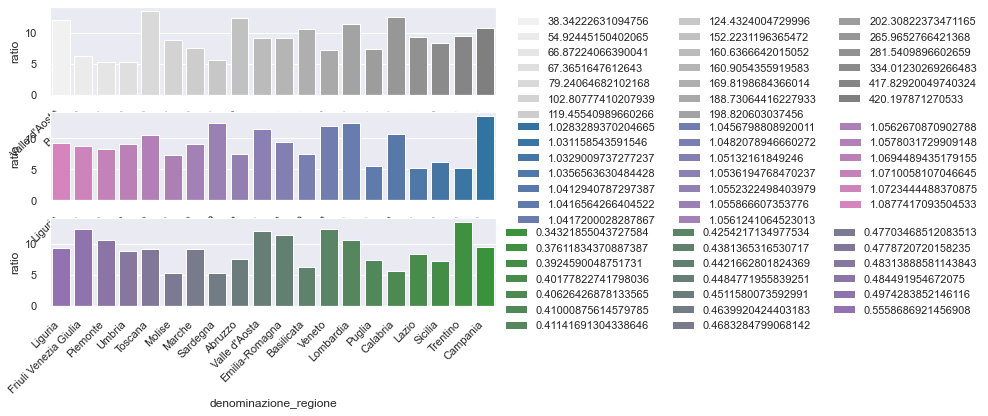

In [26]:
total_cases_by_region.sort_index(inplace=True)

total_cases_by_region["dimensions"] = [10832,10073,15222,13671,22453,7924,17232,5416,23864,9401,4461,25387,19541,24100,25832,22987,13605,8464,3261,18345]
total_cases_by_region["population_density"] = total_cases_by_region["totale_generale"] / total_cases_by_region["dimensions"]

total_cases_by_region["totale_uomini"] = regional_population_by_age.pivot_table(index="denominazione_regione", values="totale_genere_maschile", aggfunc=np.sum)["totale_genere_maschile"]
total_cases_by_region["totale_donne"] = regional_population_by_age.pivot_table(index="denominazione_regione", values="totale_genere_femminile", aggfunc=np.sum)["totale_genere_femminile"]
total_cases_by_region["women_to_men_ratio"] = total_cases_by_region["totale_donne"] / total_cases_by_region["totale_uomini"]

total_cases_by_region_correlations_fig, total_cases_by_region_correlations_axes = plt.subplots(3)

total_cases_by_region.sort_values(by="population_density", inplace=True)

sns.barplot(ax=total_cases_by_region_correlations_axes[0], x=total_cases_by_region.index, y=total_cases_by_region["ratio"], hue=total_cases_by_region["population_density"], dodge=False, color="tab:gray")
total_cases_by_region_correlations_axes[0].set_xticklabels(total_cases_by_region.index, rotation=45, ha="right")
total_cases_by_region_correlations_axes[0].ticklabel_format(style='plain', axis= 'y')
total_cases_by_region_correlations_axes[0].legend(loc = 1, ncol = 3, bbox_to_anchor=(2.1, 1))
#total_cases_by_region_correlations_axes[0].get_legend().remove()

total_cases_by_region.sort_values(by="women_to_men_ratio", inplace=True, ascending=False)

sns.barplot(ax=total_cases_by_region_correlations_axes[1], x=total_cases_by_region.index, y=total_cases_by_region["ratio"], hue=total_cases_by_region["women_to_men_ratio"], dodge=False, palette=sns.blend_palette(["tab:blue","tab:pink"], 20))
total_cases_by_region_correlations_axes[1].set_xticklabels(total_cases_by_region.index, rotation=45, ha="right")
total_cases_by_region_correlations_axes[1].ticklabel_format(style='plain', axis= 'y')
total_cases_by_region_correlations_axes[1].legend(loc = 1, ncol = 3, bbox_to_anchor=(2.1, 1))
#total_cases_by_region_correlations_axes[1].get_legend().remove()




total_cases_by_region.sort_index(inplace=True)

total_cases_by_region_with_age_info = pd.merge(total_cases_by_region, regional_population_by_age.pivot_table(index="denominazione_regione", values="totale_generale", columns='range_eta',aggfunc=np.sum), on='denominazione_regione')

total_cases_by_region_with_age_info["0-59"] = total_cases_by_region_with_age_info['0-15'] + total_cases_by_region_with_age_info['16-19'] + total_cases_by_region_with_age_info['20-29'] + total_cases_by_region_with_age_info['30-39'] + total_cases_by_region_with_age_info['40-49'] + total_cases_by_region_with_age_info['50-59']
total_cases_by_region_with_age_info["60+"] = total_cases_by_region_with_age_info['60-69'] + total_cases_by_region_with_age_info['70-79'] + total_cases_by_region_with_age_info['80-89'] + total_cases_by_region_with_age_info['90+']
total_cases_by_region_with_age_info.head()

total_cases_by_region["old_to_young_ratio"] = total_cases_by_region_with_age_info["60+"] / total_cases_by_region_with_age_info["0-59"]

total_cases_by_region.sort_values(by="old_to_young_ratio", inplace=True, ascending=False)

sns.barplot(ax=total_cases_by_region_correlations_axes[2], x=total_cases_by_region.index, y=total_cases_by_region["ratio"], hue=total_cases_by_region["old_to_young_ratio"], dodge=False, palette=sns.blend_palette(["tab:green","tab:purple"], 20))
total_cases_by_region_correlations_axes[2].set_xticklabels(total_cases_by_region.index, rotation=45, ha="right")
total_cases_by_region_correlations_axes[2].ticklabel_format(style='plain', axis= 'y')
total_cases_by_region_correlations_axes[2].legend(loc = 1, ncol = 3, bbox_to_anchor=(2.1, 1))
#total_cases_by_region_correlations_axes[2].get_legend().remove()





Dal punto di vista visivo non sembrano esserci forti correlazioni, ma sebbene un grafico di questo tipo sia utile per avere un quadro d'insieme a colpo d'occhio, esistono metodi statistici più precisi che sono in grado di determinare la correlazione tra due variabili, ossia quanto le due variabili si influenzano l'un l'altra. Dal momento che la premessa di tutto questo discorso era quella di far parlare i numeri, il modo più scientifico per esplorare possibili influenze è proprio quello di usare una matrice di correlazione.

<AxesSubplot:>

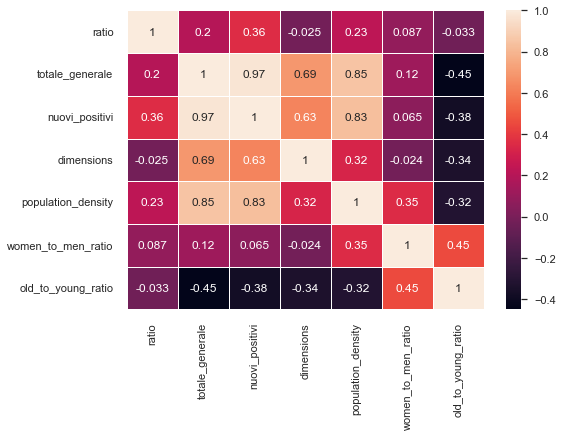

In [22]:
relevant_columns = total_cases_by_region[['ratio', 'totale_generale', 'nuovi_positivi','dimensions', 'population_density', 'women_to_men_ratio', 'old_to_young_ratio']]

correlation_matrix = relevant_columns.corr()

sns.heatmap(correlation_matrix, annot=True, linewidths=.5)

Il grafico mostra una scacchiera di valori, che si chiamano coefficienti di correlazione e corrispondono alla correlazione tra le variabili che si ottengono percorrendo la riga e la colonna della casella che si sta guardando fino all'indice. Il valore di 1 indica una correlazione perfetta, e infatti popola la diagonale ed esprime la correlazione della variabile con se stessa; in generale quindi più il valore è vicino a 1 e più la correlazione è alta.
Ci sono molti valori bassi, indice del fatto che non ci sia una forte dipendenza tra le variabili, con quaalche eccezione:
- nuovi_positivi (numero complessivo dei casi di COVID) vs totale_generale (numero di abitanti della regione, uomini e donne insieme) - 0.97: più alto è il numero di abitanti e più alto è il numero dei casi
- dimensions (superficie della regione) vs totale_generale (numero di abitanti della regione, uomini e donne insieme) - 0.69: più grande è la regione e più alto è il numero degli abitanti
- dimensions (superficie della regione) vs nuovi_positivi (numero complessivo dei casi di COVID) - 0.63: più grande è la regione, più alto è il numero degli abitanti e più alto è il numero di casi
- population_density (densità della popolazione, espressa come abitanti / superficie) vs totale_generale (numero di abitanti della regione, uomini e donne insieme) - 0.85: più alto è il numero di abitanti e più alta è la densità di popolazione
- population_density (densità della popolazione, espressa come abitanti / superficie) vs nuovi_positivi (numero complessivo dei casi di COVID) - 0.83: più alta è la densità della popolazione e più alto è il numero dei casi di COVID

Con questa matrice confermiamo una cosa abbastanza intuitiva, ossia che più abitanti ci sono in una regione e più questi abitanti sono vicini tra loro, più casi di COVID vengono registrati.

### I vaccini

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7590 entries, 2021-04-16 to 2021-04-11
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   area                      7590 non-null   object
 1   totale                    7590 non-null   int64 
 2   sesso_maschile            7590 non-null   int64 
 3   sesso_femminile           7590 non-null   int64 
 4   prima_dose                7590 non-null   int64 
 5   seconda_dose              7590 non-null   int64 
 6   pregressa_infezione       7590 non-null   int64 
 7   dose_addizionale_booster  7590 non-null   int64 
 8   codice_NUTS1              7590 non-null   object
 9   codice_NUTS2              7590 non-null   object
 10  codice_regione_ISTAT      7590 non-null   int64 
 11  nome_area                 7590 non-null   object
dtypes: int64(8), object(4)
memory usage: 770.9+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7590 entries, 

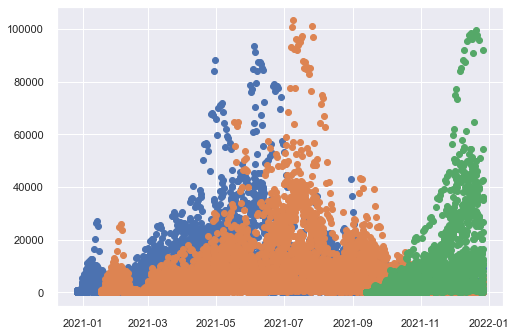

In [12]:
vaccine_data.info()
vaccine_data.replace(to_replace = 0, value = np.nan, inplace=True)
vaccine_data.info()
fig, axes = plt.subplots()

axes.scatter(y = 'prima_dose', x= vaccine_data.index, data = vaccine_data)
axes.scatter(y = 'seconda_dose', x= vaccine_data.index, data = vaccine_data)
axes.scatter(y = 'dose_addizionale_booster', x= vaccine_data.index, data = vaccine_data)